<a href="https://colab.research.google.com/github/KavitaM20AIE244/Face-Recognition-based-Attendance-System/blob/main/yolov3_face_detection/face_detection_yolov3_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
from IPython.display import Image, clear_output
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 2.0.0+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [ ]:
!git clone https://github.com/roboflow-ai/yolov3  # clone

Cloning into 'yolov3'...
remote: Enumerating objects: 8443, done.
remote: Total 8443 (delta 0), reused 0 (delta 0), pack-reused 8443
Receiving objects: 100% (8443/8443), 6.89 MiB | 12.51 MiB/s, done.
Resolving deltas: 100% (5825/5825), done.


## Get Data from Roboflow


In [ ]:
# REPLACE THIS LINK WITH YOUR OWN
!curl -L https://app.roboflow.ai/ds/REPLACE-THIS-LINK | jar -x


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    60  100    60    0     0    260      0 --:--:-- --:--:-- --:--:--   260
100    27  100    27    0     0     30      0 --:--:-- --:--:-- --:--:--     0


## Organize data and labels for Ultralytics YOLOv3 Implementation



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/YOLO_FaceDetection/Face Detection.v7-roboflow-fast-model.darknet.zip' -d /content

In [ ]:
!mkdir train

In [ ]:
!unzip "/content/drive/MyDrive/YOLO_FaceDetection/Face Detection.v7-roboflow-fast-model.darknet.zip"  -d '/content'

Streaming output truncated to the last 5000 lines.
 extracting: /content/test/Image-from-iOS_MOV-31_jpg.rf.2d7a7e4bc73a515accfdf04974fc37d3.jpg  
 extracting: /content/test/Image-from-iOS_MOV-31_jpg.rf.2d7a7e4bc73a515accfdf04974fc37d3.txt  
 extracting: /content/test/Inside-merge_mov-12_jpg.rf.314de663d9beaa40900d1677523e0e6a.jpg  
 extracting: /content/test/Inside-merge_mov-12_jpg.rf.314de663d9beaa40900d1677523e0e6a.txt  
 extracting: /content/test/Inside-merge_mov-21_jpg.rf.a5666696ba889aff50b6f01e34956b41.jpg  
 extracting: /content/test/Inside-merge_mov-21_jpg.rf.a5666696ba889aff50b6f01e34956b41.txt  
 extracting: /content/test/Inside-merge_mov-27_jpg.rf.b89b3c62680fc281b968660ee320bbeb.jpg  
 extracting: /content/test/Inside-merge_mov-27_jpg.rf.b89b3c62680fc281b968660ee320bbeb.txt  
 extracting: /content/test/Inside-merge_mov-30_jpg.rf.3802db04db9f75f2a24e09b23a2d4b9b.jpg  
 extracting: /content/test/Inside-merge_mov-30_jpg.rf.3802db04db9f75f2a24e09b23a2d4b9b.txt  
 extracting: /c

In [ ]:
%cd train

/content/train


In [ ]:
%mkdir labels
%mkdir images

In [ ]:
!pwd

/content/train


In [ ]:
import glob
import shutil
import os

dst_dir_img = "/content/train/images"
img_folders= "/content/train"

src_dir = img_folders
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
  shutil.copy(jpgfile, dst_dir_img)

dst_dir_lbl = "/content/train/labels"
lbl_folders = "/content/train"

src_dir = lbl_folders
for jpgfile in glob.iglob(os.path.join(src_dir, "*.txt")):
  shutil.copy(jpgfile, dst_dir_lbl)

In [ ]:
# %mv *.jpg ./images/
# %mv *.txt ./labels/

In [ ]:
%cd images

/content/train/images


In [ ]:
# create Ultralytics specific text file of training images
file = open("train_images_roboflow.txt", "w")
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "train_images_roboflow.txt":
        pass
      else:
        file.write("../train/images/" + filename + "\n")
file.close()

In [ ]:
!pwd

/content/train/images


In [ ]:
!ls

000_1OC3DT_jpg.rf.24a0c73b9ab25d0fc256415db947d955.jpg
000_1OC3DT_jpg.rf.3f78d20fa71b4759c4304922c6bb91cb.jpg
000_1OC3DT_jpg.rf.74888ff736f6ad8eb7c631f4fe1609b4.jpg
000_1ov3n5_0_jpeg_jpg.rf.1dd89bffae3c13974eaa2d6b4cca3ba6.jpg
000_1ov3n5_0_jpeg_jpg.rf.2186e117560bb0329ad331d378e8906d.jpg
000_1ov3n5_0_jpeg_jpg.rf.23668713b2843a98e8ca199b1aeecfe3.jpg
0002526673_jpg.rf.6642435654f420765f530016cf382342.jpg
0002526673_jpg.rf.79f356f19a9c1e14514ce59ae57ab85b.jpg
0002526673_jpg.rf.c02f95d043b3ea2750d932553a4bf06c.jpg
0009S6815V3PEU1N-C123-F4_jpg.rf.11ea3269d827c60ece68d32a05f47e13.jpg
0009S6815V3PEU1N-C123-F4_jpg.rf.3154cefcc0f54b6e21242ad5cf6ac044.jpg
0009S6815V3PEU1N-C123-F4_jpg.rf.d58f05874c6eaada7eb5a90d2018c243.jpg
000b7b75-1600_jpg.rf.3bde5e127656fa9d417415a912124a20.jpg
000b7b75-1600_jpg.rf.45eb02d6ebcb8abf268dbab01ac72f16.jpg
000b7b75-1600_jpg.rf.f338036101df902783189aa5961cea4a.jpg
001_1024_jpeg_jpg.rf.2ec61ac38f0987515cc2c918fdc8f5cd.jpg
001_1024_jpeg_jpg.rf.df49b279d7450e3061c7232e

In [ ]:
%cat train_images_roboflow.txt

../train/images/skypost16012020a01s_jpg.rf.b9b7b5f66c79b71c231776fd195891be.jpg
../train/images/IMG_4921-2_mp4-120_jpg.rf.52083d0207529b55ecf44b3740dbb8fe.jpg
../train/images/BikesHelmets259_png_jpg.rf.23154bbd10327c1d70e4d3dce983ee35.jpg
../train/images/mask-wearing-1632932291591_png_jpg.rf.69c69b09a00800636809a6ed15d9d169.jpg
../train/images/mask-wearing-1632932263553_png_jpg.rf.29cfb4b7a1b0cee5eddde09522e92fc3.jpg
../train/images/IMG_5490_mp4-12_jpg.rf.998d05aa6db0c22179b262c75eb23343.jpg
../train/images/IMG_4921-2_mp4-96_jpg.rf.58395b0bf09d7501a101e835202c1f53.jpg
../train/images/family-6398107_1280_jpeg.rf.7c837afc9544e6241c6d8b28eb263772.jpg
../train/images/001_1024_jpeg_jpg.rf.2ec61ac38f0987515cc2c918fdc8f5cd.jpg
../train/images/ashton-video_mov-112_jpg.rf.b5cef3b612be3e045663af5183d4d705.jpg
../train/images/stock-photo-mother-and-her-daughter-walking-go-to-school-with-wearing-a-protection-mask-against-pm-air-1346870465_jpg.rf.1d816e2379376353ebbc9f47c7e69204.jpg
../train/images

In [ ]:
%cd ../../valid

/content/valid


In [ ]:
%mkdir labels
%mkdir images

In [ ]:
import glob
import shutil
import os

dst_dir_img = "/content/valid/images"
img_folders= "/content/valid"

src_dir = img_folders
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
  shutil.copy(jpgfile, dst_dir_img)

dst_dir_lbl = "/content/valid/labels"
lbl_folders = "/content/valid"

src_dir = lbl_folders
for jpgfile in glob.iglob(os.path.join(src_dir, "*.txt")):
  shutil.copy(jpgfile, dst_dir_lbl)

In [ ]:
%cd images

/content/valid/images


In [ ]:
# create Ultralytics specific text file of validation images
file = open("valid_images_roboflow.txt", "w")
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "valid_images_roboflow.txt":
        pass
      else:
        file.write("../valid/images/" + filename + "\n")
file.close()

In [ ]:
%cat valid_images_roboflow.txt

../valid/images/sdgdsgsg_jpg.rf.9df58f1f49aba39f303218140481b782.jpg
../valid/images/mo-justin-mask-NoMask_mov-8_jpg.rf.4f79e904d5d97542b8a2b2a8b3cca199.jpg
../valid/images/Mask2_mov-33_jpg.rf.5c5a5cb1d95a4c2e151803b62d2a664f.jpg
../valid/images/Photo-on-10-26-21-at-2-33-PM--2--2_jpg.rf.3a72c0b447a6cb0df1bf4928a65ff1b5.jpg
../valid/images/invierno-5916164_1280_jpeg.rf.76ced3f60d999340a07eb58bef7c926b.jpg
../valid/images/Inside-merge_mov-57_jpg.rf.da6f0c2aba7cb0f441a8acccaa3981c7.jpg
../valid/images/Mask2_mov-40_jpg.rf.67099ee6f036a17280358ba77992e527.jpg
../valid/images/Inside-merge_mov-2_jpg.rf.805a463a596e37bebe5272dfad80af45.jpg
../valid/images/mask-no-mask_mov-87_jpg.rf.ff63282cea6ea1cd314e556cc958db21.jpg
../valid/images/025418_springwest005_jpg.rf.a5f80b8cbf9a21e5eefb793729340a41.jpg
../valid/images/download_jpeg_jpg.rf.371980d63f760dcb150003fc5c0fa63d.jpg
../valid/images/mask-no-mask_mov-16_jpg.rf.bf471669eb66e84879b8597ed63d2502.jpg
../valid/images/Mat-Hand-Signs_mov-205_jpg.rf

## Set up model config

We should configure our model for training.

This requires editing the `roboflow.data` file, which tells our model where to find our data, our numbers of classes, and our class label names.

Our paths for our labels and images are correct.

But we need to update our class names. That's handled below..




In [ ]:
%cd ../../yolov3/data

/content/yolov3/data


In [ ]:
# display class labels imported from Roboflow
%cat ../../train/_darknet.labels

face

In [ ]:
# convert .labels to .names for Ultralytics specification
%cat ../../train/_darknet.labels > ../../train/roboflow_data.names

In [ ]:
def get_num_classes(labels_file_path):
    classes = 0
    with open(labels_file_path, 'r') as f:
      for line in f:
        classes += 1
    return classes

In [ ]:
# update the roboflow.data file with correct number of classes
import re

num_classes = get_num_classes("../../train/_darknet.labels")
with open("roboflow.data") as f:
    s = f.read()
with open("roboflow.data", 'w') as f:

    # Set number of classes num_classes.
    s = re.sub('classes=[0-9]+',
               'classes={}'.format(num_classes), s)
    f.write(s)

In [ ]:
# display updated number of classes
%cat roboflow.data

classes=1
train=../train/images/train_images_roboflow.txt
valid=../valid/images/valid_images_roboflow.txt
names=../train/roboflow_data.names


## Training our model

Once we have our data prepped, we'll train our model using the train script.

By default, this script trains for 300 epochs.

In [ ]:
%cd ../

/content/yolov3


In [ ]:
last = '/content/drive/MyDrive/YOLO_FaceDetection2/' + 'last.pt'
last

'/content/drive/MyDrive/YOLO_FaceDetection2/last.pt'

In [ ]:
# !mkdir /content/drive/MyDrive/YOLO_FaceDetection2

In [ ]:
!cp "/content/drive/MyDrive/YOLO_FaceDetection/yolov3-spp-ultralytics.pt" /content/yolov3/weights

In [ ]:
!python3 train.py --data data/roboflow.data --epochs 300 --weights /content/drive/MyDrive/YOLO_FaceDetection2/last.pt

Namespace(epochs=300, batch_size=16, accumulate=4, cfg='cfg/yolov3-spp.cfg', data='data/roboflow.data', multi_scale=False, img_size=[416], rect=False, resume=False, nosave=False, notest=False, evolve=False, bucket='', cache_images=False, weights='/content/drive/MyDrive/YOLO_FaceDetection2/last.pt', name='', device='', adam=False, single_cls=False, var=None)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-04-21 04:43:24.723044: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 04:43:26.030958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (2202 found, 3 missing, 6 empty, 0 

## Training Evaluation metrics

In [ ]:
!cp '/content/drive/MyDrive/YOLO_FaceDetection2/results.txt'  '/content/yolov3'


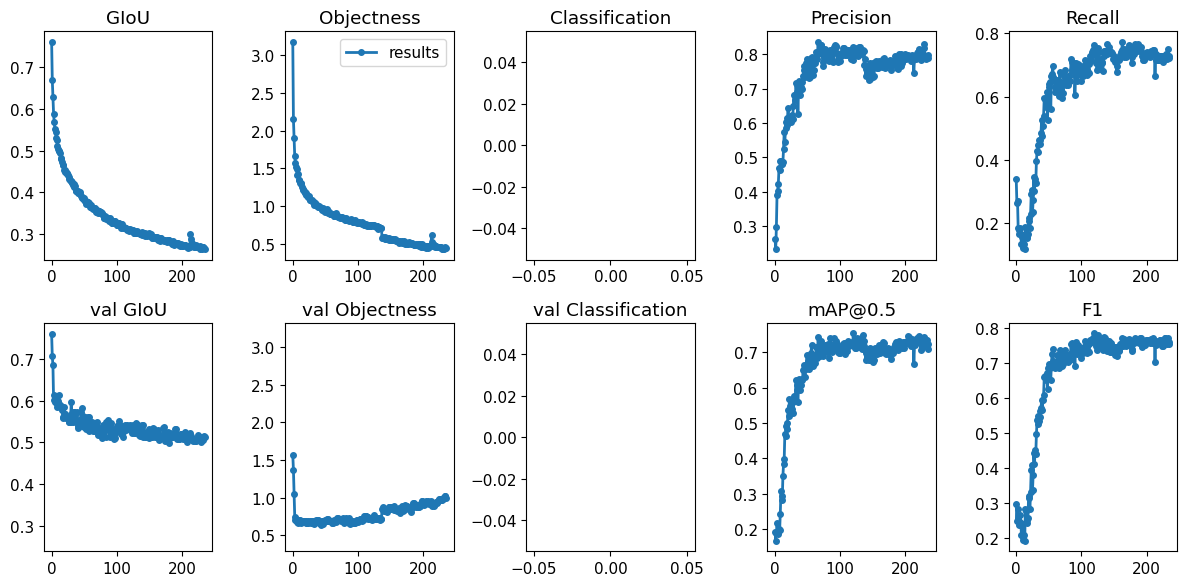

In [ ]:
from utils import utils; utils.plot_results()